In [1]:
!pip install cmake
!pip install opencv-python
!conda install -y dlib

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


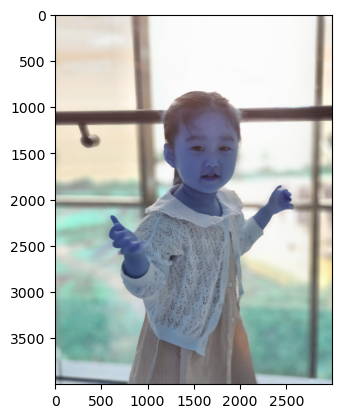

In [2]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/jy.png') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

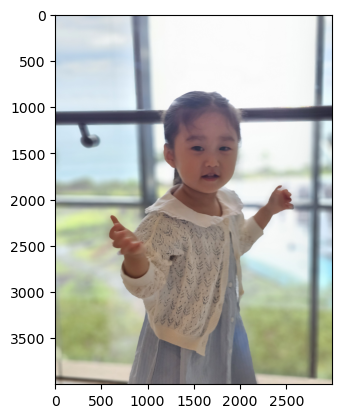

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(1315, 1242) (1981, 1907)]]


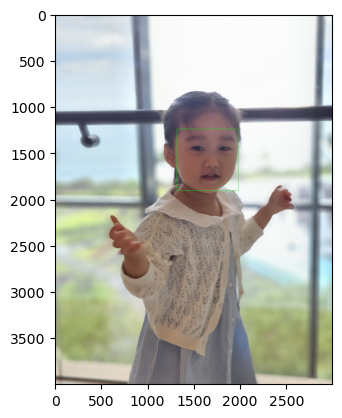

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [68]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 ~/work/camera_sticker/models
!cd ~/work/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

--2025-10-21 04:23:19--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-10-21 04:23:20--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  15.0MB/s    in 5.2s    

2025-10-21 04:23:26 (11.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file ./models/shape_predictor_68_face_landmarks.dat already exists.


In [7]:
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [8]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


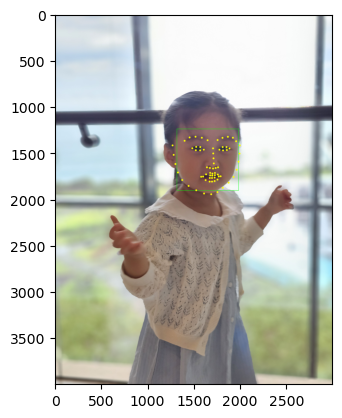

In [9]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [10]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1713, 1615)
(x,y) : (1713,1282)
(w,h) : (667,667)


In [11]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png') # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(667, 667, 3)


(np.float64(-0.5), np.float64(2999.5), np.float64(3999.5), np.float64(-0.5))

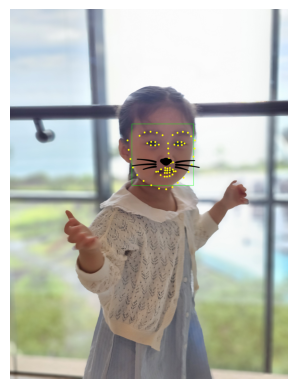

In [15]:
import numpy as np
import math
import cv2

# 알파 블렌딩 함수가 없다면 이걸 사용하세요.
def safe_alpha_blend_bgra(dst_bgr, sticker_bgra, x, y):
    H, W = dst_bgr.shape[:2]
    h, w = sticker_bgra.shape[:2]
    x1, y1 = max(0, x), max(0, y)
    x2, y2 = min(W, x + w), min(H, y + h)
    if x1 >= x2 or y1 >= y2:
        return
    sx1, sy1 = x1 - x, y1 - y
    sx2, sy2 = sx1 + (x2 - x1), sy1 + (y2 - y1)
    roi = dst_bgr[y1:y2, x1:x2].astype(np.float32)
    stk = sticker_bgra[sy1:sy2, sx1:sx2]
    if stk.shape[2] == 4:
        alpha = (stk[:, :, 3:4].astype(np.float32) / 255.0)
        fg = stk[:, :, :3].astype(np.float32)
        out = alpha * fg + (1.0 - alpha) * roi
        dst_bgr[y1:y2, x1:x2] = np.clip(out, 0, 255).astype(np.uint8)
    else:
        gray = cv2.cvtColor(stk, cv2.COLOR_BGR2GRAY)
        mask3 = (gray > 0)[:, :, None]
        out = np.where(mask3, stk, roi).astype(np.uint8)
        dst_bgr[y1:y2, x1:x2] = out
# ===== 콧수염 스티커: 입 기준으로 아래쪽에 크게 =====
# 스티커는 알파 포함 로드 권장
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png')
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # BGRA 권장
if img_sticker is None:
    raise FileNotFoundError(sticker_path)

# 크기/위치 파라미터(너비와 높이로 스티커 사이즈 조절
SCALE_W   = 3.5   # 입폭 대비 너비 배수 (크면 줄이고, 작으면 더 키우기)
RATIO_H   = 0.8   # 세로 비율
V_POS     = 0.35   # 코아래(30)→윗입술(51) 사이에서 아래쪽으로 얼마나 내릴지 (0~1)

img_out = img_show.copy()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 기준 포인트
    L = landmark[48]   # 왼쪽 입꼬리
    R = landmark[54]   # 오른쪽 입꼬리
    N = landmark[29]   # 콧방울 윗족
    U = landmark[51]   # 윗입술 중앙

    # 회전각: 입선(48–54)의 기울기
    dx, dy = (R[0] - L[0]), (R[1] - L[1])
    angle_deg = math.degrees(math.atan2(dy, dx))

    # 크기: 입꼬리 간 거리 기반 (넉넉하게)
    mouth_w = (dx**2 + dy**2) ** 0.5
    w = int(max(40, mouth_w * SCALE_W))
    h = int(max(20, w * RATIO_H))

    # 중심: 입꼬리 중점, 세로는 코아래→윗입술 방향으로 V_POS만큼 아래
    cx = (L[0] + R[0]) // 2
    cy_line = U[1] - N[1]          # 아래 방향 양수
    cy = int(N[1] + cy_line * V_POS + h * 0.10)  # 살짝 더 아래로 (h*0.10)

    # 좌상단 좌표
    refined_x = int(cx - w / 2)
    refined_y = int(cy - h / 2)

    # 리사이즈 + 회전
    sticker_rs = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)
    center = (w // 2, h // 2)
    border_val = (0, 0, 0, 0) if sticker_rs.shape[2] == 4 else (0, 0, 0)
    M = cv2.getRotationMatrix2D(center, angle_deg, 1.0)
    sticker_rot = cv2.warpAffine(
        sticker_rs, M, (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=border_val
    )

    # 합성
    safe_alpha_blend_bgra(img_out, sticker_rot, refined_x, refined_y)

# 결과 확인
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.axis('off')

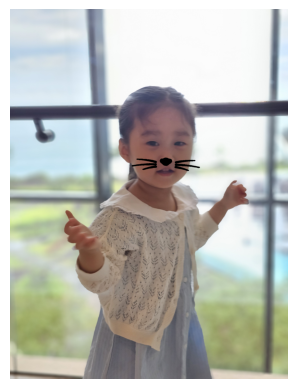

In [18]:
# --- 최종 합성본을 img_bgr에 만듬 ---
H, W = img_bgr.shape[:2]
h, w = sticker_rot.shape[:2]

# 경계 클리핑
x1 = max(0, refined_x)
y1 = max(0, refined_y)
x2 = min(W, refined_x + w)
y2 = min(H, refined_y + h)
if x1 >= x2 or y1 >= y2:
    raise RuntimeError("스티커 영역이 화면 밖입니다.")

sx1, sy1 = x1 - refined_x, y1 - refined_y
sx2, sy2 = sx1 + (x2 - x1), sy1 + (y2 - y1)

roi = img_bgr[y1:y2, x1:x2]                 # (Hroi, Wroi, 3)
stk = sticker_rot[sy1:sy2, sx1:sx2]         # (Hroi, Wroi, 3 or 4)

if stk.shape[2] == 4:
    # BGRA: 알파>0인 곳만 스티커의 BGR로 대체
    alpha = (stk[:, :, 3] > 0)[:, :, None]  # (Hroi, Wroi, 1) → 브로드캐스트용
    stk_bgr = stk[:, :, :3]
    out = np.where(alpha, stk_bgr, roi).astype(np.uint8)
else:
    # BGR: 내용(밝기) 있는 픽셀만 스티커로 간주
    gray = cv2.cvtColor(stk, cv2.COLOR_BGR2GRAY)
    mask3 = (gray > 0)[:, :, None]
    out = np.where(mask3, stk, roi).astype(np.uint8)

img_bgr[y1:y2, x1:x2] = out

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
# 1. dlib을 이용하여 얼굴의 bounding box위치 찾음
# 2. landmark 위치를 찾고 랜드마크 표기를 크게 키워 사진에서 잘 보이도록 함
# 2. 왼쪽 입꼬리[48]와 오른쪽 입꼬리[54] 사이, 콧망울 윗쪽[29]와 윗입술 중앙[51] 사이를 스티커 적용 위치로 선정
# 3. 스티커 사이즈 조절 및 얼굴 기울임에 따라 기울기 적용